Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Step 2: Loading the Dataset

In [2]:
cars_data = pd.read_csv('pakwheels dataset.csv')

Step 3: Exploratory Data Analysis

In [3]:
# Check for missing values
print("Missing values in each column:")
print(cars_data.isnull().sum())

Missing values in each column:
Car_Body        0
Car_Name        0
Year            0
Engine          0
Transmission    0
Fueltype        0
Mileage         0
Price           0
dtype: int64


In [4]:
# Drop rows with missing values
cars_data = cars_data.dropna()

In [5]:
# Removing duplicates
cars_data.drop_duplicates(inplace=True)

In [6]:
print(cars_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6613 entries, 0 to 6612
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_Body      6613 non-null   object
 1   Car_Name      6613 non-null   object
 2   Year          6613 non-null   int64 
 3   Engine        6613 non-null   int64 
 4   Transmission  6613 non-null   object
 5   Fueltype      6613 non-null   object
 6   Mileage       6613 non-null   int64 
 7   Price         6613 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 413.4+ KB
None


In [7]:
cars_data.head()

,Car_Body,Car_Name,Year,Engine,Transmission,Fueltype,Mileage,Price
0,Hatchback,Move,2019,660,Automatic,Petrol,77450,3650000
1,Hatchback,Move,2019,660,Automatic,Petrol,47499,3850000
2,Hatchback,Move,2019,660,Automatic,Petrol,69951,3550000
3,Hatchback,Move,2019,660,Automatic,Petrol,83465,3550000
4,SUV,Land,2022,3500,Automatic,Petrol,12000,89800000


In [8]:
cars_data.shape

(6613, 8)

In [9]:
# Display unique values in each column
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of Car_Body
['Hatchback' 'SUV' 'Crossover' 'Sedan' 'Micro Van' 'MPV' 'Van'
 'Compact SUV' 'Station Wagon' 'Mini Van' 'Double Cabin' 'Convertible'
 'Coupe' 'Pick Up' 'Mini Vehicles' 'High Roof' 'Compact sedan'
 'Compact hatchback' 'Truck' 'Single Cabin']
Unique values of Car_Name
['Move' 'Land' 'Vitz' 'Alto' 'Passo' 'C-HR' 'Hustler' 'Corolla' 'Raize'
 'Fortuner' 'Vezel' 'N' 'Picanto' 'Yaris' 'Prius' 'Benz' 'Every' 'X70'
 'Grand' 'Wagon' 'Dayz' 'Mira' 'Prado' 'Flair' 'Clipper' 'Hiace' 'Vitara'
 'Aygo' 'Saga' 'HS' 'Fit' 'A3' 'BR-V' 'Sienta' 'Oshan' 'Rover' 'Celerio'
 'Sorento' 'LX' 'Cast' 'X1' 'Q2' 'A4' 'Note' 'V2' 'Ek' 'Cayenne' 'Grace'
 'A6' 'Boon' 'Aqua' 'Thor' 'Civic' 'Q7' 'Pearl' 'Hijet' 'Mehran' 'Xbee'
 'Tundra' 'Juke' 'Karvaan' 'Elantra' 'Harrier' 'Voxy' 'ZS' 'Stonic'
 'Kizashi' 'Freed' 'Crown' 'Glory' 'Sonata' 'Jimny' 'Premio' 'Roomy'
 'Swift' 'Carol' 'Camry' 'Insight' 'Alsvin' 'Tucson' 'CR-V' 'Tiggo'
 'Sportage' 'MX' 'Jade' 'RX' 'City' 'Tacoma' 'Moco' 'Taft' 'EK' 'A

C:\Users\hp\AppData\Local\Temp\ipykernel_14028\3697806177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=cars_data, palette='bright', ax=axes[i], saturation=0.95)
C:\Users\hp\AppData\Local\Temp\ipykernel_14028\3697806177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=cars_data, palette='bright', ax=axes[i], saturation=0.95)
C:\Users\hp\AppData\Local\Temp\ipykernel_14028\3697806177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=cars_data, palette='bright', ax=axes[i], saturatio

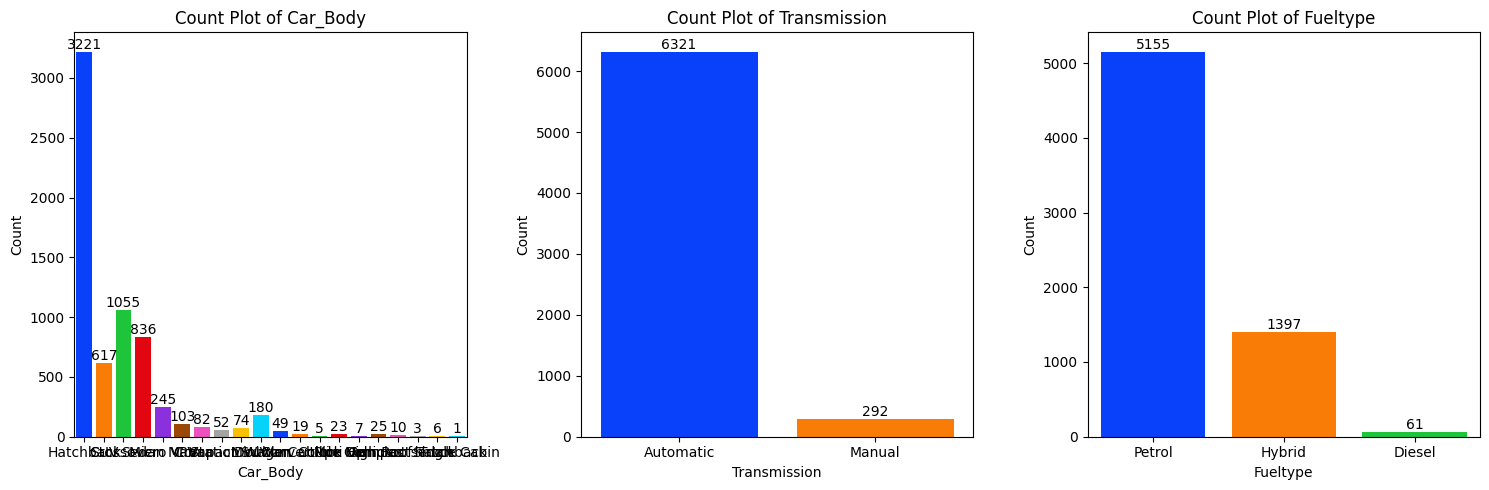

In [10]:
# List of categorical columns for visualization
categorical_columns = ['Car_Body', 'Transmission', 'Fueltype']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))
axes = axes.ravel()
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=cars_data, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

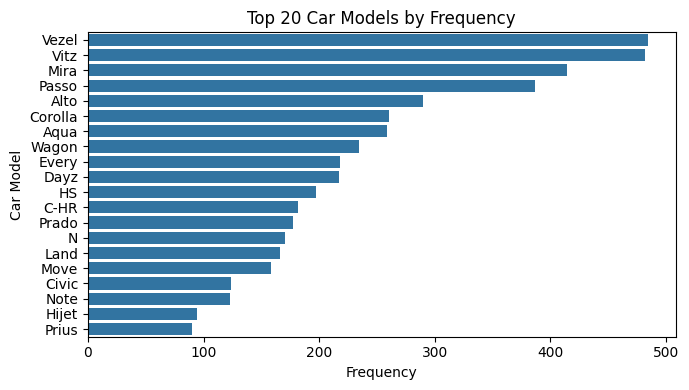

In [11]:
#Top car models by frequency
n = 20  # Number of top car models to plot
top_car_models = cars_data['Car_Name'].value_counts().head(n)
plt.figure(figsize=(7, 4))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14028\3992467003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Car_Body', y='Price', data=cars_data, palette='Set2')


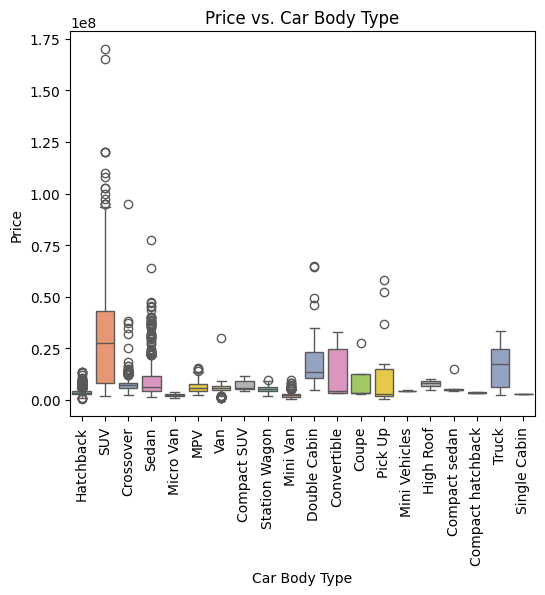

In [12]:
# This chart shows how car prices vary for different car body types.
plt.figure(figsize=(6, 5))
sns.boxplot(x='Car_Body', y='Price', data=cars_data, palette='Set2')
plt.title('Price vs. Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14028\2557213927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='Price', data=cars_data, palette='Set2')


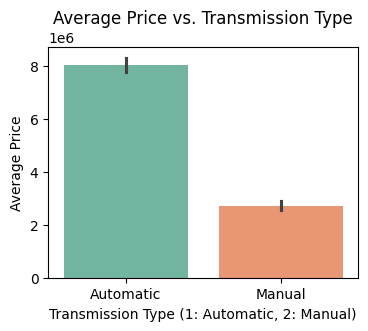

In [13]:
#the average car price for each transmission type (Automatic vs. Manual).
plt.figure(figsize=(4, 3))
sns.barplot(x='Transmission', y='Price', data=cars_data, palette='Set2')
plt.title('Average Price vs. Transmission Type')
plt.xlabel('Transmission Type (1: Automatic, 2: Manual)')
plt.ylabel('Average Price')
plt.show()

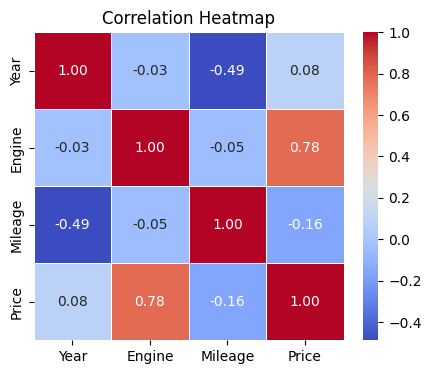

In [14]:
# List of numerical columns for correlation analysis
numerical_columns = ['Year', 'Engine', 'Mileage', 'Price']
correlation_matrix = cars_data[numerical_columns].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Step 4: Data Preprocessing

Encoding categorical features





In [15]:
# Count of unique car names
unique_car_names = cars_data['Car_Name'].nunique()
print(unique_car_names)

168


In [16]:
# Encoding the 'Car_Name' column
cars_data['Car_Name'].replace(
    ['Move', 'Land', 'Vitz', 'Alto', 'Passo', 'C-HR', 'Hustler', 'Corolla', 'Raize',
     'Fortuner', 'Vezel', 'N', 'Picanto', 'Yaris', 'Prius', 'Benz', 'Every', 'X70',
     'Grand', 'Wagon', 'Dayz', 'Mira', 'Prado', 'Flair', 'Clipper', 'Hiace', 'Vitara',
     'Aygo', 'Saga', 'HS', 'Fit', 'A3', 'BR-V', 'Sienta', 'Oshan', 'Rover', 'Celerio',
     'Sorento', 'LX', 'Cast', 'X1', 'Q2', 'A4', 'Note', 'V2', 'Ek', 'Cayenne', 'Grace',
     'A6', 'Boon', 'Aqua', 'Thor', 'Civic', 'Q7', 'Pearl', 'Hijet', 'Mehran', 'Xbee',
     'Tundra', 'Juke', 'Karvaan', 'Elantra', 'Harrier', 'Voxy', 'ZS', 'Stonic', 'Kizashi',
     'Freed', 'Crown', 'Glory', 'Sonata', 'Jimny', 'Premio', 'Roomy', 'Swift', 'Carol',
     'Camry', 'Insight', 'Alsvin', 'Tucson', 'CR-V', 'Tiggo', 'Sportage', 'MX', 'Jade',
     'RX', 'City', 'Tacoma', 'Moco', 'Taft', 'EK', 'Avanza', 'H6', 'Ciaz', 'Pixis', 'A5',
     'Hilux', 'Serena', 'S660', 'Tanto', 'Bravo', 'Spacia', 'Stella', 'F', 'A8', 'Roox',
     'X-PV', 'Cultus', 'BJ40', 'Rocky', 'Kicks', 'Sierra', 'Copen', 'Kona', 'Spike', 'Q3',
     'Tank', 'Mark', 'X2', 'X7', 'Noah', 'Jolion', 'Challenger', 'Terios', 'Panamera',
     'CT200h', 'Cx3', 'Esquire', 'Ignis', 'Bolan', 'MR', 'Rush', 'Accord', 'iQ', 'Wrangler',
     'D-Max', 'Ravi', 'Shehzore', 'Pleo', 'Vamos', 'Probox', 'Titan', 'X200', 'CR-Z', 'Z100',
     'Mirage', 'Mega', 'A7', 'Nx', 'HR-V', 'Niro', 'K07', 'Amarok', 'Gladiator', 'Patrol',
     'Atrai', 'Acty', 'Frontier', 'S', 'Otti', 'X', 'A800', 'Sirius', 'Ioniq', 'Life', 'Cerato',
     'Sambar', 'Gen', 'Minica'],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
     25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
     47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
     68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
     89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107,
     108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
     125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
     142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
     159, 160, 161, 162, 163, 164, 165, 166, 167, 168,169],
    inplace=True
)



C:\Users\hp\AppData\Local\Temp\ipykernel_14028\22846387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['Car_Name'].replace(
C:\Users\hp\AppData\Local\Temp\ipykernel_14028\22846387.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['Car_Name'].replace(


In [17]:
# Count of unique car body names
cars_data['Car_Body'].unique()

array(['Hatchback', 'SUV', 'Crossover', 'Sedan', 'Micro Van', 'MPV',
       'Van', 'Compact SUV', 'Station Wagon', 'Mini Van', 'Double Cabin',
       'Convertible', 'Coupe', 'Pick Up', 'Mini Vehicles', 'High Roof',
       'Compact sedan', 'Compact hatchback', 'Truck', 'Single Cabin'],
      dtype=object)

In [18]:
# Encoding the 'Car_Body' column
cars_data['Car_Body'].replace(['Hatchback', 'SUV', 'Crossover', 'Sedan', 'Micro Van', 'MPV',
       'Van', 'Compact SUV', 'Station Wagon', 'Mini Van', 'Double Cabin',
       'Convertible', 'Coupe', 'Pick Up', 'Mini Vehicles', 'High Roof',
       'Compact sedan', 'Compact hatchback', 'Truck', 'Single Cabin'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] ,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14028\3645406501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['Car_Body'].replace(['Hatchback', 'SUV', 'Crossover', 'Sedan', 'Micro Van', 'MPV',
C:\Users\hp\AppData\Local\Temp\ipykernel_14028\3645406501.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [19]:
# Count of unique transmission
cars_data['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [20]:
# Encoding the 'Transmission' column
cars_data['Transmission'].replace(['Automatic', 'Manual'],[1,2], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14028\1586291614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['Transmission'].replace(['Automatic', 'Manual'],[1,2], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14028\1586291614.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c

In [21]:
# Count of unique fueltype
cars_data['Fueltype'].unique()

array(['Petrol', 'Hybrid', 'Diesel'], dtype=object)

In [22]:
 # Encoding the 'Fueltype' column
cars_data['Fueltype'].replace(['Petrol', 'Hybrid', 'Diesel'],[1,2,3], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14028\1635613199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['Fueltype'].replace(['Petrol', 'Hybrid', 'Diesel'],[1,2,3], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14028\1635613199.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [23]:
cars_data

,Car_Body,Car_Name,Year,Engine,Transmission,Fueltype,Mileage,Price
0,1,1,2019,660,1,1,77450,3650000
1,1,1,2019,660,1,1,47499,3850000
2,1,1,2019,660,1,1,69951,3550000
3,1,1,2019,660,1,1,83465,3550000
4,2,2,2022,3500,1,1,12000,89800000
...,...,...,...,...,...,...,...,...
6608,4,16,2016,1600,1,1,110000,13500000
6609,4,53,2017,1800,1,1,47000,5200000
6610,3,11,2017,1500,1,1,54000,7600000
6611,1,4,2015,660,1,1,65000,2420000


In [24]:
# Final dataset overview
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
Car_Body
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
------------
Car_Name
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 161 162 163
 164 165 166 167 168 169]
------------
Year
[2019 2022 2020 2018 2015 2017 2016 2021]
------------
Engine
[ 660 3500 1500 1000 1800  996 1300 2700  998 2000 3470 1496 4600 2800
 1600 1490 1499 1997 3479 5700 1400 1198 1200 3000 1197 4608

In [25]:
# Separating input and output data
input_data = cars_data.drop(columns=['Price'])
output_data =cars_data['Price']

Step 5: Splitting the Data

In [26]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

Step 6: Model Training

In [27]:
# Initialize and train Random Forest model with parameters to reduce overfitting
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

In [28]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

Step 7: Model Evaluation



In [29]:
# Predict on the test set
y_pred = rf_model.predict(x_test)

In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [31]:
# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r_squared)

Mean Squared Error (MSE): 14237623342942.73
Mean Absolute Error (MAE): 1168877.6391610608
R-squared (R²): 0.8991998715909223


Step 8: Prediction on New Input

In [32]:
# Predict on new input data
input_data_model = pd.DataFrame(
    [[1,1, 2019, 660, 1, 1, 77450]],  # Example input
    columns=['Car_Body', 'Car_Name', 'Year', 'Engine', 'Transmission', 'Fueltype', 'Mileage']
)
predicted_price = rf_model.predict(input_data_model)
print("Predicted Price:", predicted_price)

Predicted Price: [3648218.52749491]


        Feature  Importance
3        Engine    0.436967
1      Car_Name    0.256774
0      Car_Body    0.169529
6       Mileage    0.070389
2          Year    0.057668
5      Fueltype    0.005324
4  Transmission    0.003349


C:\Users\hp\AppData\Local\Temp\ipykernel_14028\1611439625.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


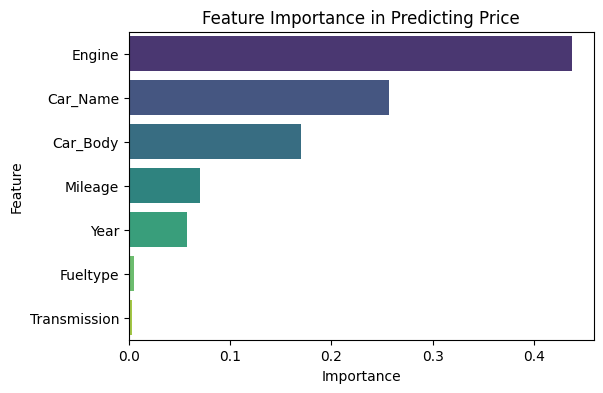

In [33]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': input_data.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Predicting Price')
plt.show()

Step 9: Save the Model

In [34]:
import pickle as pk

In [35]:
pk.dump(rf_model, open('rf_model.pkl', 'wb'))